In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Reading in the data

In [2]:
crimeBis = pd.read_csv('contributions_crime_business_licenses_by_ward.csv')
crimeBis.head()

FileNotFoundError: ignored

In [ ]:
wardContributions = pd.read_csv('contributions_with_ward_data.csv')
wardContributions.head()

,Unnamed: 0,CONTRIBUTION_ID,PERIOD_START,PERIOD_END,CONTRIBUTION_DATE,RECIPIENT,AMOUNT,LOBBYIST_ID,LOBBYIST_FIRST_NAME,LOBBYIST_LAST_NAME,CREATED_DATE,Ward,ID
0,0,2240204276,07/01/2020,09/30/2020,08/24/2020,ALDERMAN MARIA HADDEN,250.0,23981,ALEXANDRA,SIMS,12/01/2020,49,95040.0
1,1,16680854,04/01/2020,06/30/2020,06/10/2020,24TH WARD ORGANIZATION - ALD. MICHAEL SCOTT,500.0,16501,REYAHD,KAZMI,12/10/2020,24,264924.0
2,2,146026078,01/01/2020,03/31/2020,02/18/2020,ALD. GILBERT VILLEGAS,150.0,16501,REYAHD,KAZMI,12/10/2020,36,70359.0
3,3,2237026963,10/01/2020,12/31/2020,12/18/2020,NaN,0.0,24286,TOM,FEENEY,12/18/2020,0,NaN
4,4,279679753,10/01/2020,12/31/2020,12/18/2020,N?A,0.0,24286,TOM,FEENEY,12/18/2020,0,NaN


In [ ]:
crimes = pd.read_csv('Crimes_-_2001_to_Present.csv')
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


## contributions_crime_business_licenses_by_ward EDA

In [ ]:
crimeBis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CONTRIBUTION_ID             2793 non-null   int64  
 1   PERIOD_START                2793 non-null   object 
 2   PERIOD_END                  2793 non-null   object 
 3   CONTRIBUTION_DATE           2793 non-null   object 
 4   RECIPIENT                   2793 non-null   object 
 5   AMOUNT                      2793 non-null   float64
 6   LOBBYIST_ID                 2793 non-null   int64  
 7   LOBBYIST_FIRST_NAME         2793 non-null   object 
 8   LOBBYIST_LAST_NAME          2793 non-null   object 
 9   CREATED_DATE                2793 non-null   object 
 10  Ward                        2793 non-null   int64  
 11  ID                          2793 non-null   float64
 12  Year                        2793 non-null   int64  
 13  Month                       2793 

In [ ]:
crimeBis.isnull().sum()

CONTRIBUTION_ID               0
PERIOD_START                  0
PERIOD_END                    0
CONTRIBUTION_DATE             0
RECIPIENT                     0
AMOUNT                        0
LOBBYIST_ID                   0
LOBBYIST_FIRST_NAME           0
LOBBYIST_LAST_NAME            0
CREATED_DATE                  0
Ward                          0
ID                            0
Year                          0
Month                         0
Quarter                       0
Period                        0
Crime Count                   0
New Business License Count    0
dtype: int64

In [ ]:
crimeBis.dtypes

CONTRIBUTION_ID                 int64
PERIOD_START                   object
PERIOD_END                     object
CONTRIBUTION_DATE              object
RECIPIENT                      object
AMOUNT                        float64
LOBBYIST_ID                     int64
LOBBYIST_FIRST_NAME            object
LOBBYIST_LAST_NAME             object
CREATED_DATE                   object
Ward                            int64
ID                            float64
Year                            int64
Month                           int64
Quarter                        object
Period                         object
Crime Count                     int64
New Business License Count    float64
dtype: object

In [ ]:
duplicate_rows_crimeBis = crimeBis[crimeBis.duplicated()]
print('number of duplicate rows: ', duplicate_rows_crimeBis.shape)

number of duplicate rows:  (0, 18)


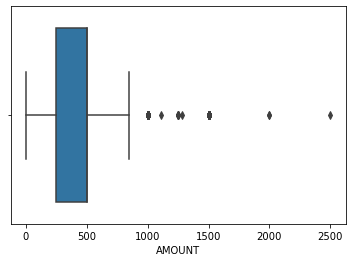

In [ ]:
sns.boxplot(x=crimeBis['AMOUNT'])

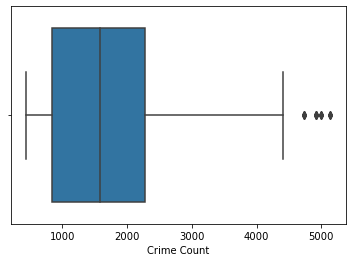

In [ ]:
sns.boxplot(x=crimeBis['Crime Count'])

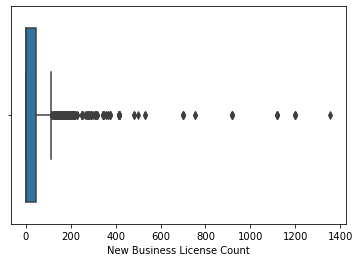

In [ ]:
sns.boxplot(x=crimeBis['New Business License Count'])

## contributions_with_ward_data EDA

In [ ]:
wardContributions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5362 entries, 0 to 5361
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5362 non-null   int64  
 1   CONTRIBUTION_ID      5362 non-null   int64  
 2   PERIOD_START         5362 non-null   object 
 3   PERIOD_END           5362 non-null   object 
 4   CONTRIBUTION_DATE    5362 non-null   object 
 5   RECIPIENT            5294 non-null   object 
 6   AMOUNT               5362 non-null   float64
 7   LOBBYIST_ID          5362 non-null   int64  
 8   LOBBYIST_FIRST_NAME  5362 non-null   object 
 9   LOBBYIST_LAST_NAME   5362 non-null   object 
 10  CREATED_DATE         5362 non-null   object 
 11  Ward                 5362 non-null   int64  
 12  ID                   2793 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 544.7+ KB


In [ ]:
wardContributions.isnull().sum()

Unnamed: 0                0
CONTRIBUTION_ID           0
PERIOD_START              0
PERIOD_END                0
CONTRIBUTION_DATE         0
RECIPIENT                68
AMOUNT                    0
LOBBYIST_ID               0
LOBBYIST_FIRST_NAME       0
LOBBYIST_LAST_NAME        0
CREATED_DATE              0
Ward                      0
ID                     2569
dtype: int64

In [ ]:
wardContributions.dtypes

Unnamed: 0               int64
CONTRIBUTION_ID          int64
PERIOD_START            object
PERIOD_END              object
CONTRIBUTION_DATE       object
RECIPIENT               object
AMOUNT                 float64
LOBBYIST_ID              int64
LOBBYIST_FIRST_NAME     object
LOBBYIST_LAST_NAME      object
CREATED_DATE            object
Ward                     int64
ID                     float64
dtype: object

In [ ]:
duplicate_rows_wardContributions = wardContributions[wardContributions.duplicated()]
print('number of duplicate rows: ', duplicate_rows_wardContributions.shape)

number of duplicate rows:  (0, 13)


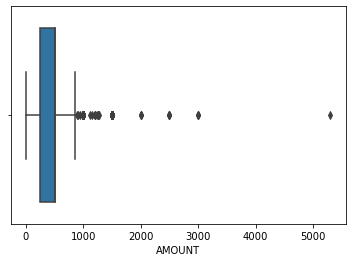

In [ ]:
sns.boxplot(x=wardContributions['AMOUNT'])

## Crimes_-_2001_to_Present EDA

In [ ]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7318362 entries, 0 to 7318361
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [ ]:
crimes.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8230
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614835
Community Area          613484
FBI Code                     0
X Coordinate             72446
Y Coordinate             72446
Year                         0
Updated On                   0
Latitude                 72446
Longitude                72446
Location                 72446
dtype: int64

In [ ]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [ ]:
duplicate_rows_crimes = crimes[crimes.duplicated()]
print('number of duplicate rows: ', duplicate_rows_crimes.shape)

number of duplicate rows:  (0, 22)


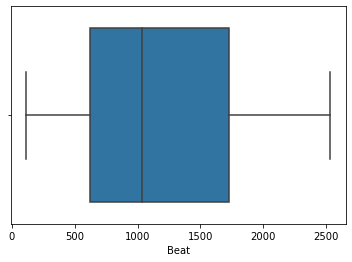

In [ ]:
sns.boxplot(x=crimes['Beat'])

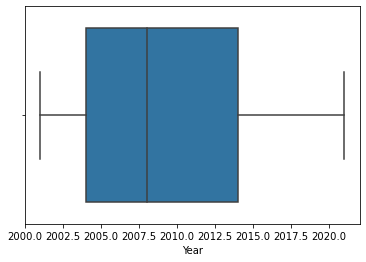

In [ ]:
sns.boxplot(x=crimes['Year'])

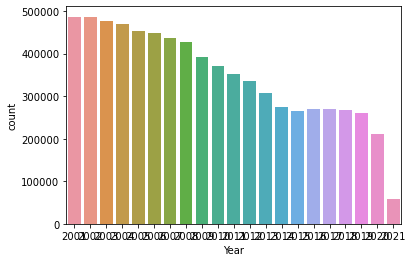

In [ ]:
ax = sns.countplot(x="Year", data=crimes)

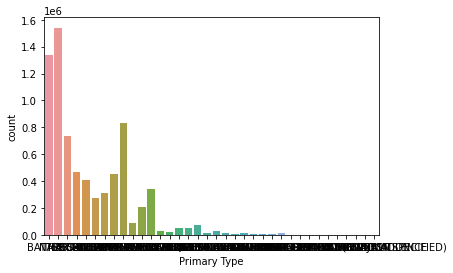

In [ ]:
ax = sns.countplot(x="Primary Type", data=crimes)

In [ ]:
crimes['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION', 'HOMICIDE',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [ ]:
crimes['Primary Type'].value_counts()

THEFT                                1540855
BATTERY                              1340517
CRIMINAL DAMAGE                       833405
NARCOTICS                             737610
ASSAULT                               465454
OTHER OFFENSE                         454449
BURGLARY                              409566
MOTOR VEHICLE THEFT                   337384
DECEPTIVE PRACTICE                    311344
ROBBERY                               274919
CRIMINAL TRESPASS                     206226
WEAPONS VIOLATION                      88807
PROSTITUTION                           69388
OFFENSE INVOLVING CHILDREN             51152
PUBLIC PEACE VIOLATION                 50932
SEX OFFENSE                            28051
CRIM SEXUAL ASSAULT                    27916
INTERFERENCE WITH PUBLIC OFFICER       17606
GAMBLING                               14596
LIQUOR LAW VIOLATION                   14496
ARSON                                  12311
HOMICIDE                               11025
KIDNAPPING